**Loading dataset and Performing EDA**

In [382]:

import pandas as pd
df = pd.read_csv('station_day.csv')
stations = pd.read_csv("stations.csv")

In [383]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [384]:
stations.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [385]:
df.shape
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   StationId   108035 non-null  object        
 1   Date        108035 non-null  datetime64[ns]
 2   PM2.5       86410 non-null   float64       
 3   PM10        65329 non-null   float64       
 4   NO          90929 non-null   float64       
 5   NO2         91488 non-null   float64       
 6   NOx         92535 non-null   float64       
 7   NH3         59930 non-null   float64       
 8   CO          95037 non-null   float64       
 9   SO2         82831 non-null   float64       
 10  O3          82467 non-null   float64       
 11  Benzene     76580 non-null   float64       
 12  Toluene     69333 non-null   float64       
 13  Xylene      22898 non-null   float64       
 14  AQI         87025 non-null   float64       
 15  AQI_Bucket  87025 non-null   object        
dtypes:

In [386]:
aqi_ranges = df.groupby("AQI_Bucket")["AQI"].agg(["min", "max"]).reset_index()
aqi_ranges

,AQI_Bucket,min,max
0,Good,8.0,50.0
1,Moderate,101.0,200.0
2,Poor,201.0,300.0
3,Satisfactory,51.0,100.0
4,Severe,401.0,2049.0
5,Very Poor,301.0,400.0


In [387]:
missing = df.isna().sum()
percent = (df.isna().sum() / len(df)) * 100

missing_table = pd.DataFrame({'Missing Values': missing,
                              'Percent (%)': percent})

missing_table

,Missing Values,Percent (%)
StationId,0,0.000000
Date,0,0.000000
PM2.5,21625,20.016661
PM10,42706,39.529782
NO,17106,15.833758
NO2,16547,15.316333
NOx,15500,14.347202
NH3,48105,44.527237
CO,12998,12.031286
SO2,25204,23.329477


In [388]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
stats = df[numeric_cols].describe().T
stats['median'] = df[numeric_cols].median()
stats

,count,mean,std,min,25%,50%,75%,max,median
PM2.5,86410.0,80.272571,76.526403,0.02,31.880,55.95,99.9200,1000.00,55.95
PM10,65329.0,157.968427,123.418672,0.01,70.150,122.09,208.6700,1000.00,122.09
NO,90929.0,23.123424,34.491019,0.01,4.840,10.29,24.9800,470.00,10.29
NO2,91488.0,35.240760,29.510827,0.01,15.090,27.21,46.9300,448.05,27.21
NOx,92535.0,41.195055,45.145976,0.00,13.970,26.66,50.5000,467.63,26.66
NH3,59930.0,28.732875,24.897797,0.01,11.900,23.59,38.1375,418.90,23.59
CO,95037.0,1.605749,4.369578,0.00,0.530,0.91,1.4500,175.81,0.91
SO2,82831.0,12.257634,12.984723,0.01,5.040,8.95,14.9200,195.65,8.95
O3,82467.0,38.134836,39.128004,0.01,18.895,30.84,47.1400,963.00,30.84
Benzene,76580.0,3.358029,11.156234,0.00,0.160,1.21,3.6100,455.03,1.21


In [389]:
## how many rows has missing AQI and AQI bucket
df[df['AQI'].isna() & df['AQI_Bucket'].isna()].shape[0]

21010

In [390]:
## how maany rows has completely missing values of all pollutants
pollutant_cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']
df[pollutant_cols].isna().all(axis=1).sum()

6887

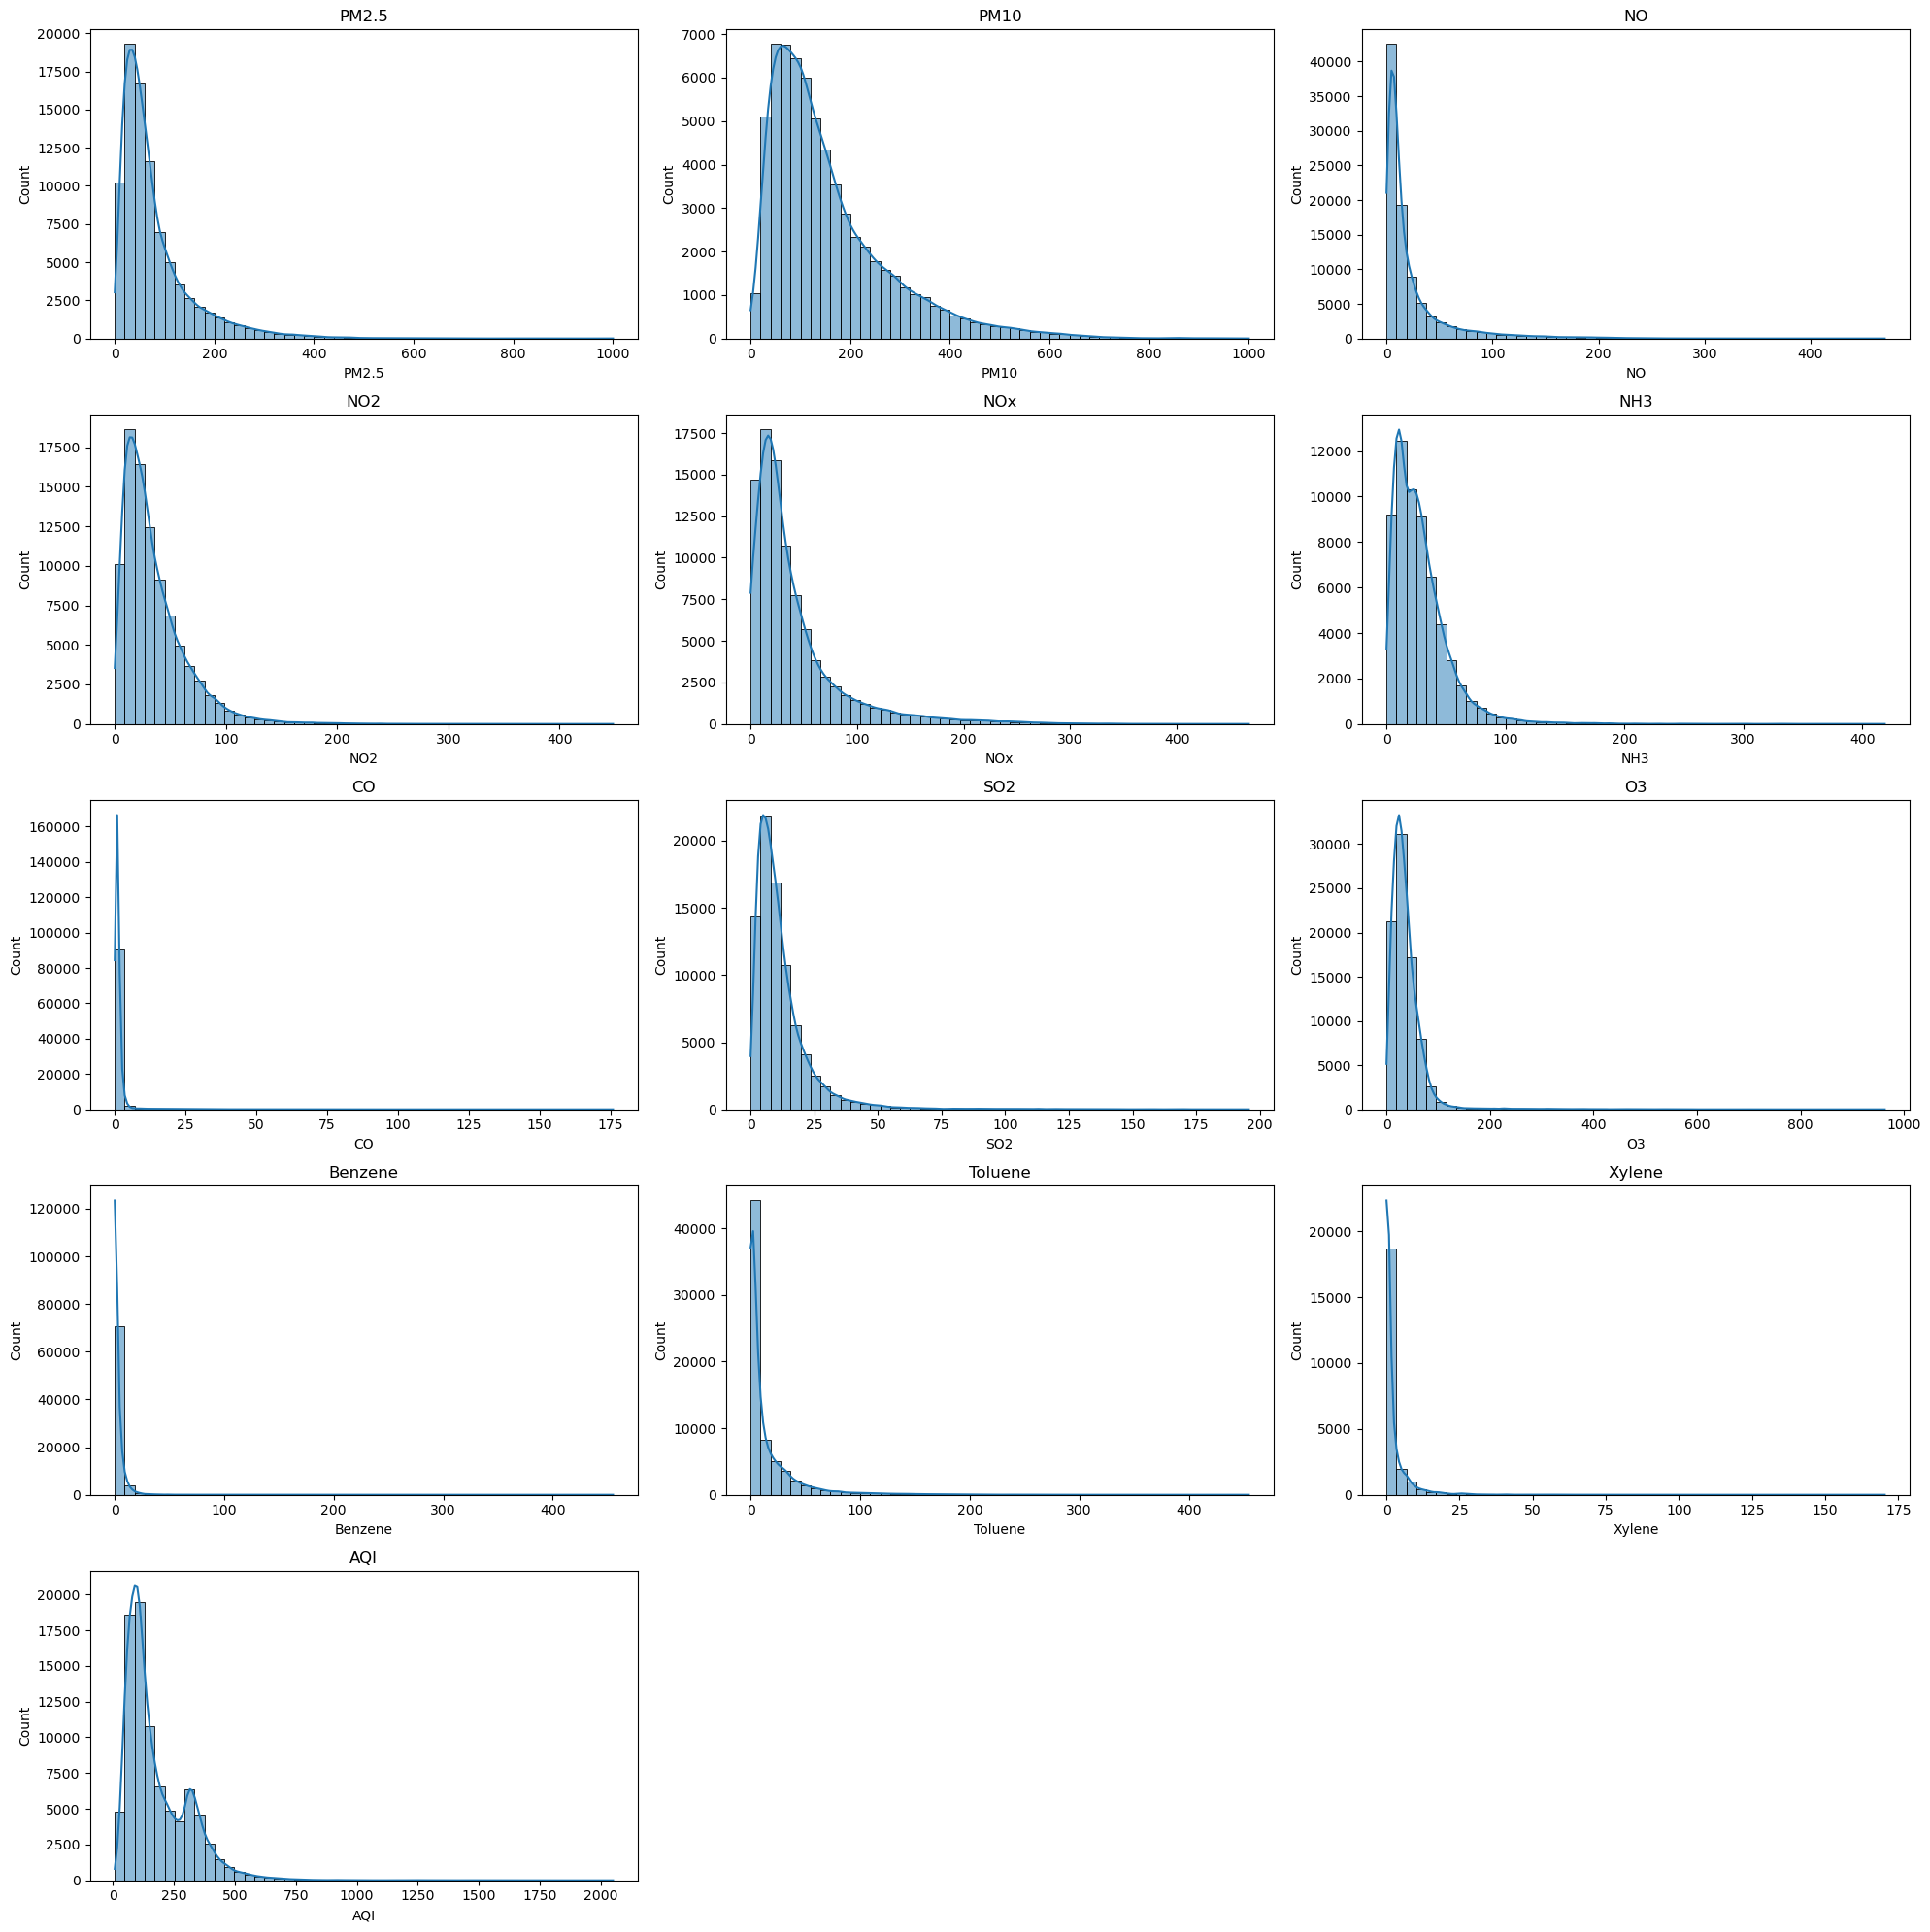

In [391]:
import seaborn as sns


num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


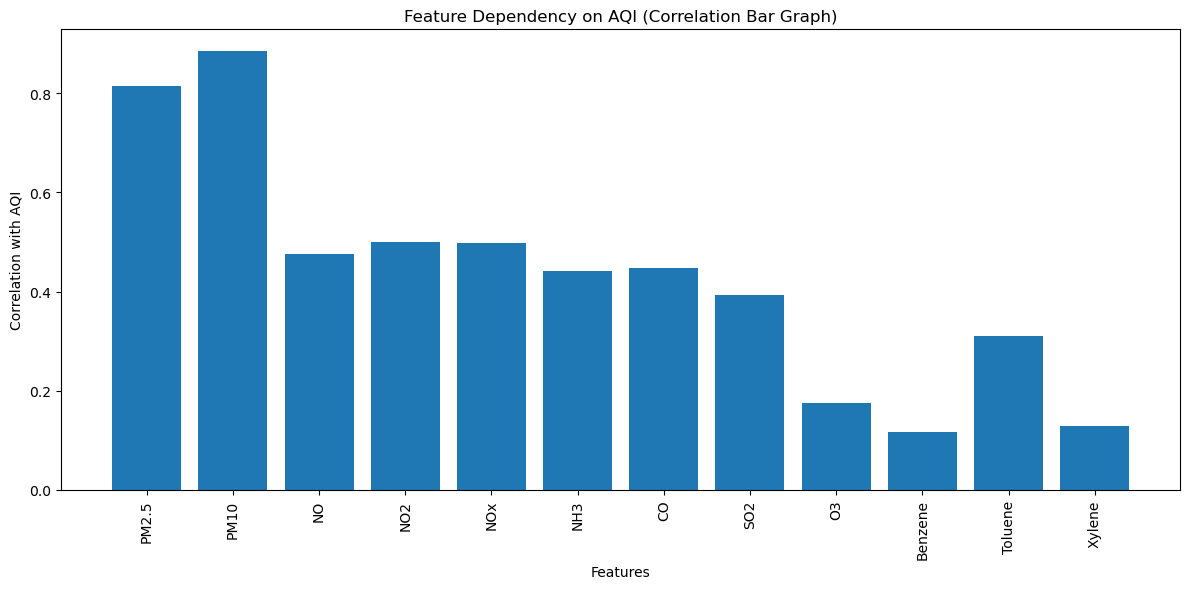

In [392]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_with_aqi = df[numeric_cols].corr()['AQI'].drop('AQI')

plt.figure(figsize=(12,6))
plt.bar(corr_with_aqi.index, corr_with_aqi.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Correlation with AQI")
plt.title("Feature Dependency on AQI (Correlation Bar Graph)")
plt.tight_layout()
plt.show()


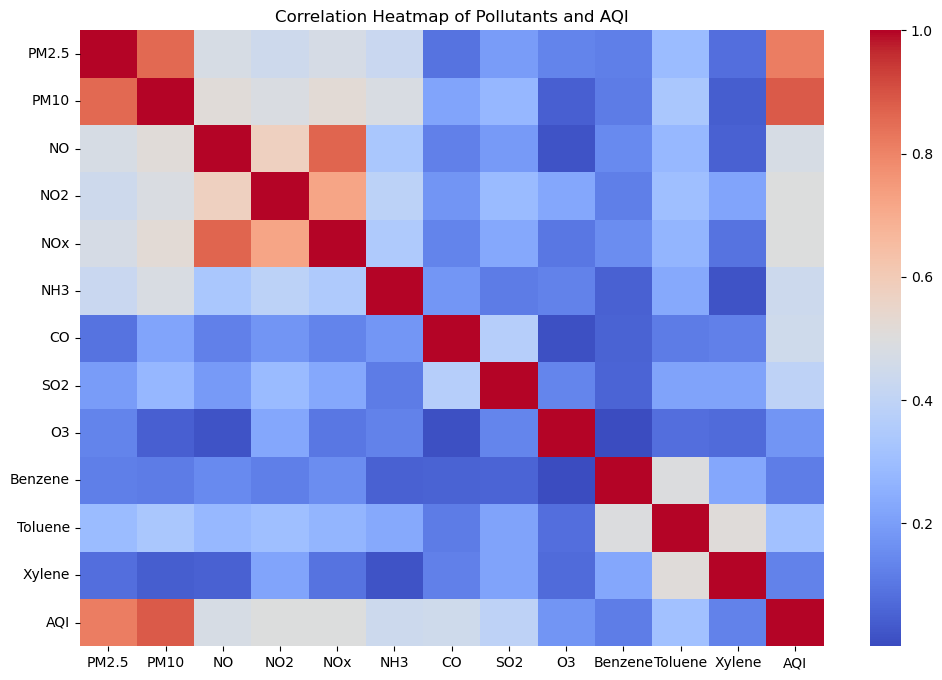

In [393]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()


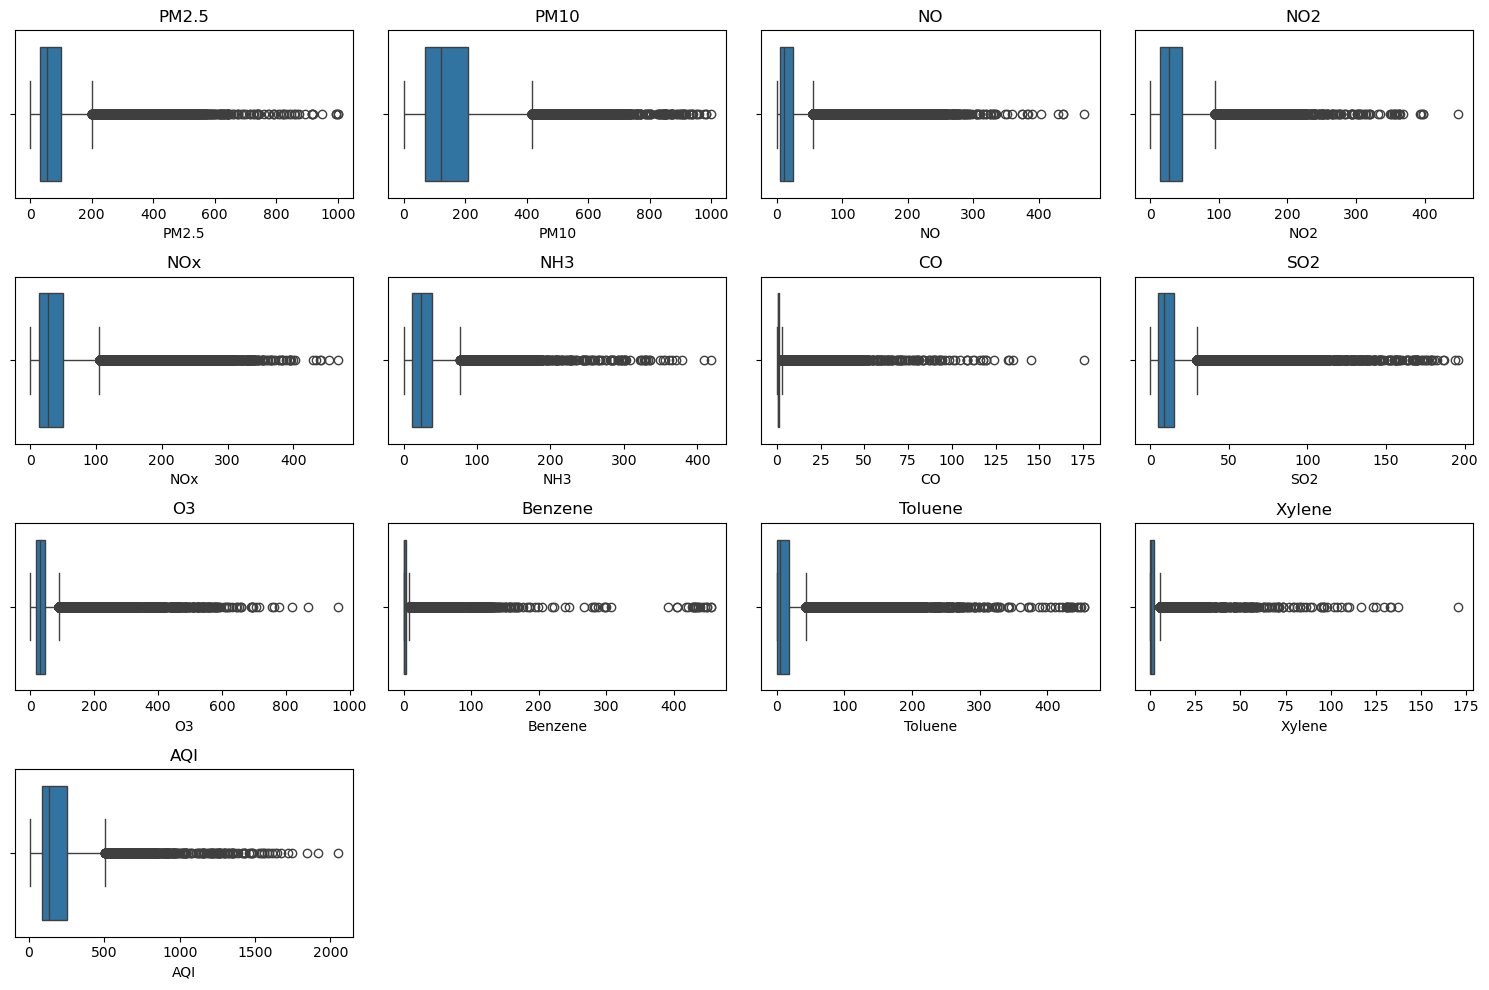

In [394]:


numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [395]:
df_before = df

In [396]:
def get_season(month, state):

    north = ['Delhi','Haryana','Punjab','Uttar Pradesh','Rajasthan']
    south = ['Andhra Pradesh','Telangana','Tamil Nadu','Karnataka','Kerala']
    east  = ['West Bengal','Odisha','Bihar','Jharkhand']
    west  = ['Maharashtra','Gujarat','Goa']
    northeast = ['Assam','Meghalaya','Manipur','Nagaland','Tripura','Mizoram','Arunachal Pradesh','Sikkim']

    if state in north:
        if month in [12,1,2]: return "Winter"
        elif month in [3,4,5,6]: return "Summer"
        elif month in [7,8,9]: return "Monsoon"
        elif month in [10,11]: return "Post-Monsoon"

    if state in south:
        if month in [12,1]: return "Winter"
        elif month in [2,3,4]: return "Pre-Summer"
        elif month in [6,7,8,9]: return "Southwest Monsoon"
        elif month in [10,11]: return "Northeast Monsoon"

    if state in east:
        if month in [12,1,2]: return "Winter"
        elif month in [3,4,5]: return "Summer"
        elif month in [6,7,8,9]: return "Monsoon"
        elif month in [10,11]: return "Post-Monsoon"

    if state in west:
        if month in [12,1,2]: return "Winter"
        elif month in [3,4,5,6]: return "Summer"
        elif month in [7,8,9]: return "Monsoon"
        elif month in [10,11]: return "Post-Monsoon"

    if state in northeast:
        if month in [12,1,2]: return "Winter"
        elif month in [3,4]: return "Pre-Summer"
        elif month in [5,6,7,8,9]: return "Monsoon"
        elif month in [10,11]: return "Post-Monsoon"

    return "Unknown"

In [397]:


df = df.merge(stations[['StationId', 'State']], on='StationId', how='left')

df['Month'] = df['Date'].dt.month



df['Season'] = df.apply(lambda row: get_season(row['Month'], row['State']), axis=1)
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
cols = list(df.columns)
cols.remove('State')
cols.remove('Month')
cols.remove('Year')
cols.remove('Day')
cols.remove('Season')
insert_pos = cols.index('StationId') + 1
cols[insert_pos:insert_pos] = ['State', 'Year','Month','Day', 'Season']
df = df[cols]
pd.set_option('display.max_columns', None)
df.head()


,StationId,State,Year,Month,Day,Season,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,Andhra Pradesh,2017,11,24,Northeast Monsoon,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,Andhra Pradesh,2017,11,25,Northeast Monsoon,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,Andhra Pradesh,2017,11,26,Northeast Monsoon,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,Andhra Pradesh,2017,11,27,Northeast Monsoon,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,Andhra Pradesh,2017,11,28,Northeast Monsoon,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [398]:
df.shape

(108035, 21)

In [399]:
df = df.drop(columns=['Date'])
df = df.drop(columns=['Xylene'])

In [400]:
pollutant_cols = [
    'PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3',
    'Benzene','Toluene','AQI'
]
df = df[~df[pollutant_cols].isna().all(axis=1)]
df = df.reset_index(drop=True)


In [401]:
df

,StationId,State,Year,Month,Day,Season,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,AP001,Andhra Pradesh,2017,11,24,Northeast Monsoon,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,NaN,NaN
1,AP001,Andhra Pradesh,2017,11,25,Northeast Monsoon,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,184.0,Moderate
2,AP001,Andhra Pradesh,2017,11,26,Northeast Monsoon,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,197.0,Moderate
3,AP001,Andhra Pradesh,2017,11,27,Northeast Monsoon,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,198.0,Moderate
4,AP001,Andhra Pradesh,2017,11,28,Northeast Monsoon,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101142,WB013,West Bengal,2020,6,27,Monsoon,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,50.0,Good
101143,WB013,West Bengal,2020,6,28,Monsoon,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,65.0,Satisfactory
101144,WB013,West Bengal,2020,6,29,Monsoon,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,63.0,Satisfactory
101145,WB013,West Bengal,2020,6,30,Monsoon,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,57.0,Satisfactory


In [402]:
pred_df = df[df['AQI'].isna() | df['AQI_Bucket'].isna()]
pred_df.shape
pred_df

,StationId,State,Year,Month,Day,Season,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,AP001,Andhra Pradesh,2017,11,24,Northeast Monsoon,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,NaN,NaN
117,AP001,Andhra Pradesh,2018,3,21,Pre-Summer,48.71,96.46,5.63,14.86,12.65,13.01,0.92,15.45,27.48,0.06,1.73,NaN,NaN
133,AP001,Andhra Pradesh,2018,4,6,Pre-Summer,29.89,71.75,5.08,9.62,9.25,9.17,0.87,10.34,20.63,0.00,1.12,NaN,NaN
138,AP001,Andhra Pradesh,2018,4,11,Pre-Summer,13.00,29.00,3.80,2.80,4.60,20.10,NaN,NaN,19.60,0.00,0.80,NaN,NaN
139,AP001,Andhra Pradesh,2018,4,12,Pre-Summer,9.25,35.45,4.70,4.60,6.48,9.06,0.54,6.20,21.66,0.00,0.89,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100885,WB013,West Bengal,2019,10,4,Post-Monsoon,28.39,31.53,3.73,36.53,40.27,5.56,1.20,5.49,38.83,1.87,5.07,NaN,NaN
100886,WB013,West Bengal,2019,10,5,Post-Monsoon,37.50,55.08,19.82,45.93,65.75,5.36,1.63,3.54,30.29,4.55,7.18,NaN,NaN
101007,WB013,West Bengal,2020,2,3,Winter,50.34,101.10,82.70,73.88,147.50,39.74,0.25,7.62,79.38,6.06,11.38,NaN,NaN
101106,WB013,West Bengal,2020,5,22,Summer,25.08,41.79,1.65,11.62,13.26,23.05,0.68,3.15,27.14,0.87,4.46,NaN,NaN


In [403]:
new_df = df.dropna(subset=['AQI', 'AQI_Bucket']).reset_index(drop=True)
new_df.shape
new_df.to_csv("station_day_modified.csv", index=False)

In [356]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(
    new_df.drop(['AQI'], axis=1),
    new_df['AQI'],
    test_size=0.2,
    random_state=42
)


In [357]:
train_X

,StationId,State,Year,Month,Day,Season,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket
44947,JH001,Jharkhand,2018,10,20,Post-Monsoon,NaN,222.86,6.92,6.97,NaN,6.58,0.00,NaN,29.82,NaN,NaN,Poor
22086,DL019,Delhi,2019,12,9,Winter,182.29,300.52,82.47,88.24,114.06,29.63,2.20,3.32,8.72,6.48,42.12,Very Poor
14488,DL012,Delhi,2018,7,11,Monsoon,37.10,99.77,6.15,19.15,25.30,NaN,0.52,NaN,30.52,NaN,NaN,Moderate
73063,TG006,Telangana,2018,10,18,Northeast Monsoon,55.72,76.77,15.67,44.43,36.38,24.76,0.70,2.17,30.12,2.30,38.00,Satisfactory
12840,DL009,Delhi,2019,3,6,Summer,62.05,142.35,32.71,38.70,47.25,22.99,1.04,14.48,23.14,2.30,33.18,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,DL002,Delhi,2017,12,18,Winter,172.55,343.96,88.77,97.46,0.00,68.93,1.82,26.75,21.08,3.64,7.99,Poor
54886,KA011,Karnataka,2019,11,8,Northeast Monsoon,60.80,115.43,43.98,45.11,58.58,17.45,1.63,1.36,28.12,0.54,1.94,Moderate
76820,TN003,Tamil Nadu,2019,11,1,Northeast Monsoon,81.80,NaN,107.86,44.33,125.83,173.30,1.20,6.49,NaN,NaN,NaN,Very Poor
860,AP005,Andhra Pradesh,2016,7,29,Southwest Monsoon,23.40,81.96,15.24,29.87,25.91,11.19,1.11,31.45,20.92,6.81,12.52,Satisfactory


In [358]:
val_X

,StationId,State,Year,Month,Day,Season,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket
20109,DL018,Delhi,2018,4,26,Summer,170.03,484.71,110.93,113.44,86.61,24.75,1.72,7.85,24.28,0.81,0.63,Very Poor
81817,UP014,Uttar Pradesh,2018,9,10,Monsoon,55.07,NaN,16.72,40.03,34.66,NaN,0.96,4.32,14.54,0.00,0.00,Satisfactory
37391,DL034,Delhi,2019,9,1,Monsoon,29.54,152.68,15.19,55.74,41.44,10.97,1.27,4.70,26.87,2.01,17.90,Moderate
26244,DL023,Delhi,2020,6,4,Summer,71.98,176.17,12.60,41.09,32.09,46.43,1.64,14.29,35.25,1.98,92.97,Moderate
54405,KA010,Karnataka,2020,6,14,Southwest Monsoon,NaN,26.29,12.55,22.96,35.01,NaN,0.40,5.41,NaN,NaN,NaN,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18600,DL016,Delhi,2019,3,9,Summer,61.04,149.35,28.68,78.12,64.95,34.68,1.94,28.49,33.59,2.15,25.81,Moderate
28146,DL026,Delhi,2018,5,3,Summer,41.73,151.78,2.83,25.33,45.24,16.06,0.73,1.37,16.84,2.09,0.73,Moderate
73268,TG006,Telangana,2019,6,8,Southwest Monsoon,43.67,83.87,0.84,34.15,18.84,11.33,0.67,2.10,51.82,2.81,25.59,Satisfactory
10005,DL006,Delhi,2018,12,15,Winter,104.50,175.63,7.43,17.68,25.11,NaN,2.45,NaN,28.48,NaN,NaN,Poor


In [359]:
train_y

44947    223.0
22086    356.0
14488    101.0
73063     91.0
12840    131.0
         ...  
6265     266.0
54886    137.0
76820    321.0
860       79.0
15795    191.0
Name: AQI, Length: 69620, dtype: float64

In [360]:
val_y

20109    368.0
81817     85.0
37391    143.0
26244    146.0
54405     45.0
         ...  
18600    149.0
28146    142.0
73268     78.0
10005    247.0
82651    177.0
Name: AQI, Length: 17405, dtype: float64

In [361]:
pollutant_cols = [
    'PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3',
    'Benzene','Toluene'
]

df_before_impute = new_df.copy()
new_df[pollutant_cols] = train_df[pollutant_cols].fillna(train_df[pollutant_cols].median())

df_after_impute = new_df.copy()

In [362]:
print(new_df.isna().sum())


StationId     0
State         0
Year          0
Month         0
Day           0
Season        0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64


In [363]:
aqi_ranges = new_df.groupby("AQI_Bucket")["AQI"].agg(["min", "max"]).reset_index()
aqi_ranges



,AQI_Bucket,min,max
0,Good,8.0,50.0
1,Moderate,101.0,200.0
2,Poor,201.0,300.0
3,Satisfactory,51.0,100.0
4,Severe,401.0,2049.0
5,Very Poor,301.0,400.0


In [364]:
new_df = new_df.drop(columns=['AQI_Bucket'])
new_df.head()

,StationId,State,Year,Month,Day,Season,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,AP001,Andhra Pradesh,2017,11,25,Northeast Monsoon,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,184.0
1,AP001,Andhra Pradesh,2017,11,26,Northeast Monsoon,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,197.0
2,AP001,Andhra Pradesh,2017,11,27,Northeast Monsoon,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,198.0
3,AP001,Andhra Pradesh,2017,11,28,Northeast Monsoon,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,188.0
4,AP001,Andhra Pradesh,2017,11,29,Northeast Monsoon,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,173.0


In [365]:
before_stats = df_before[pollutant_cols].describe().T
before_stats['median'] = df_before[pollutant_cols].median()
before_stats


,count,mean,std,min,25%,50%,75%,max,median
PM2.5,86410.0,80.272571,76.526403,0.02,31.880,55.95,99.9200,1000.00,55.95
PM10,65329.0,157.968427,123.418672,0.01,70.150,122.09,208.6700,1000.00,122.09
NO,90929.0,23.123424,34.491019,0.01,4.840,10.29,24.9800,470.00,10.29
NO2,91488.0,35.240760,29.510827,0.01,15.090,27.21,46.9300,448.05,27.21
NOx,92535.0,41.195055,45.145976,0.00,13.970,26.66,50.5000,467.63,26.66
NH3,59930.0,28.732875,24.897797,0.01,11.900,23.59,38.1375,418.90,23.59
CO,95037.0,1.605749,4.369578,0.00,0.530,0.91,1.4500,175.81,0.91
SO2,82831.0,12.257634,12.984723,0.01,5.040,8.95,14.9200,195.65,8.95
O3,82467.0,38.134836,39.128004,0.01,18.895,30.84,47.1400,963.00,30.84
Benzene,76580.0,3.358029,11.156234,0.00,0.160,1.21,3.6100,455.03,1.21


In [366]:
after_stats = df_after_impute[pollutant_cols].describe().T
after_stats['median'] = df_after_impute[pollutant_cols].median()
after_stats


,count,mean,std,min,25%,50%,75%,max,median
PM2.5,87025.0,79.416995,74.575227,0.04,32.96,56.17,97.33,1000.00,56.17
PM10,87025.0,148.610429,106.440785,0.03,89.37,122.43,167.02,976.77,122.43
NO,87025.0,22.910802,34.284270,0.02,4.92,10.22,24.18,437.85,10.22
NO2,87025.0,34.977047,28.781179,0.01,15.39,27.24,46.29,448.05,27.24
NOx,87025.0,42.458055,44.316270,0.00,16.16,28.18,50.47,434.90,28.18
NH3,87025.0,26.976453,19.606079,0.01,18.00,23.76,29.74,365.68,23.76
CO,87025.0,1.593586,4.184997,0.00,0.61,0.95,1.44,175.81,0.95
SO2,87025.0,11.867300,11.803530,0.01,5.53,9.06,13.96,186.08,9.06
O3,87025.0,37.501031,37.399769,0.01,20.42,30.89,44.66,963.00,30.89
Benzene,87025.0,3.069497,10.147303,0.00,0.48,1.38,2.83,455.03,1.38


<Figure size 1200x600 with 0 Axes>

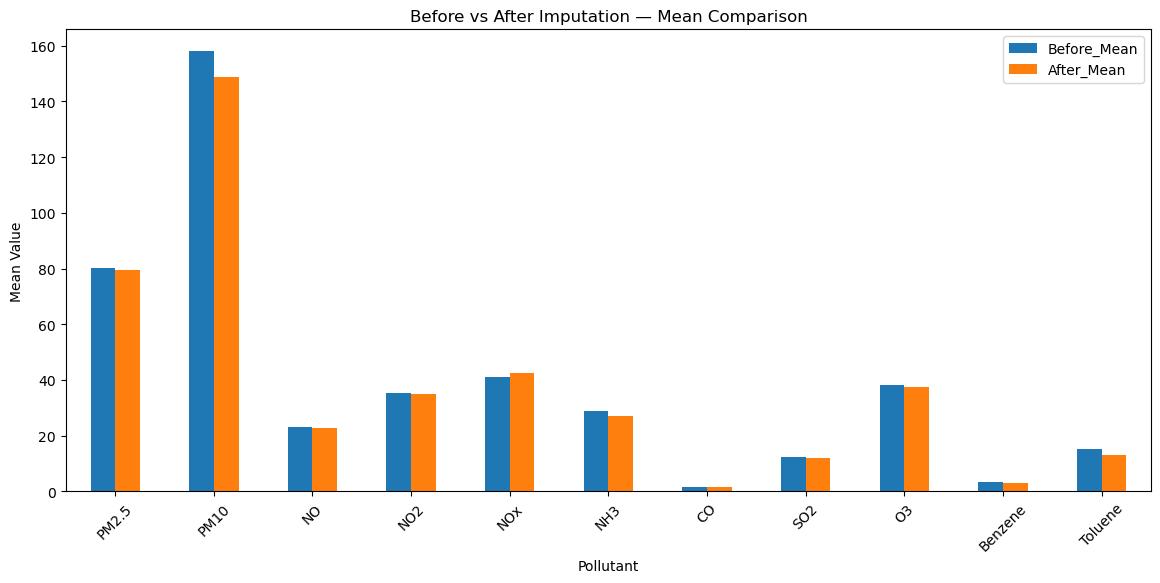

<Figure size 1200x600 with 0 Axes>

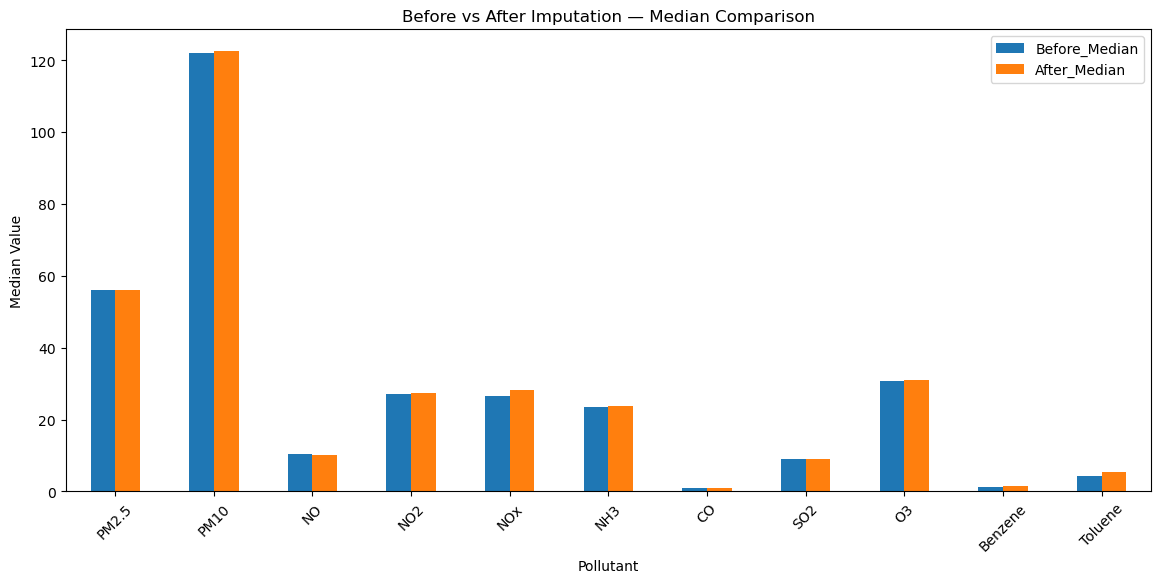

In [367]:
comparison = pd.DataFrame({
    "Before_Mean": df_before[pollutant_cols].mean(),
    "After_Mean":df_after_impute[pollutant_cols].mean(),
    "Before_Median": df_before[pollutant_cols].median(),
    "After_Median": df_after_impute[pollutant_cols].median(),
})



import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
comparison[['Before_Mean', 'After_Mean']].plot(kind='bar', figsize=(14,6))
plt.title("Before vs After Imputation — Mean Comparison")
plt.xlabel("Pollutant")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
comparison[['Before_Median', 'After_Median']].plot(kind='bar', figsize=(14,6))
plt.title("Before vs After Imputation — Median Comparison")
plt.xlabel("Pollutant")
plt.ylabel("Median Value")
plt.xticks(rotation=45)
plt.show()



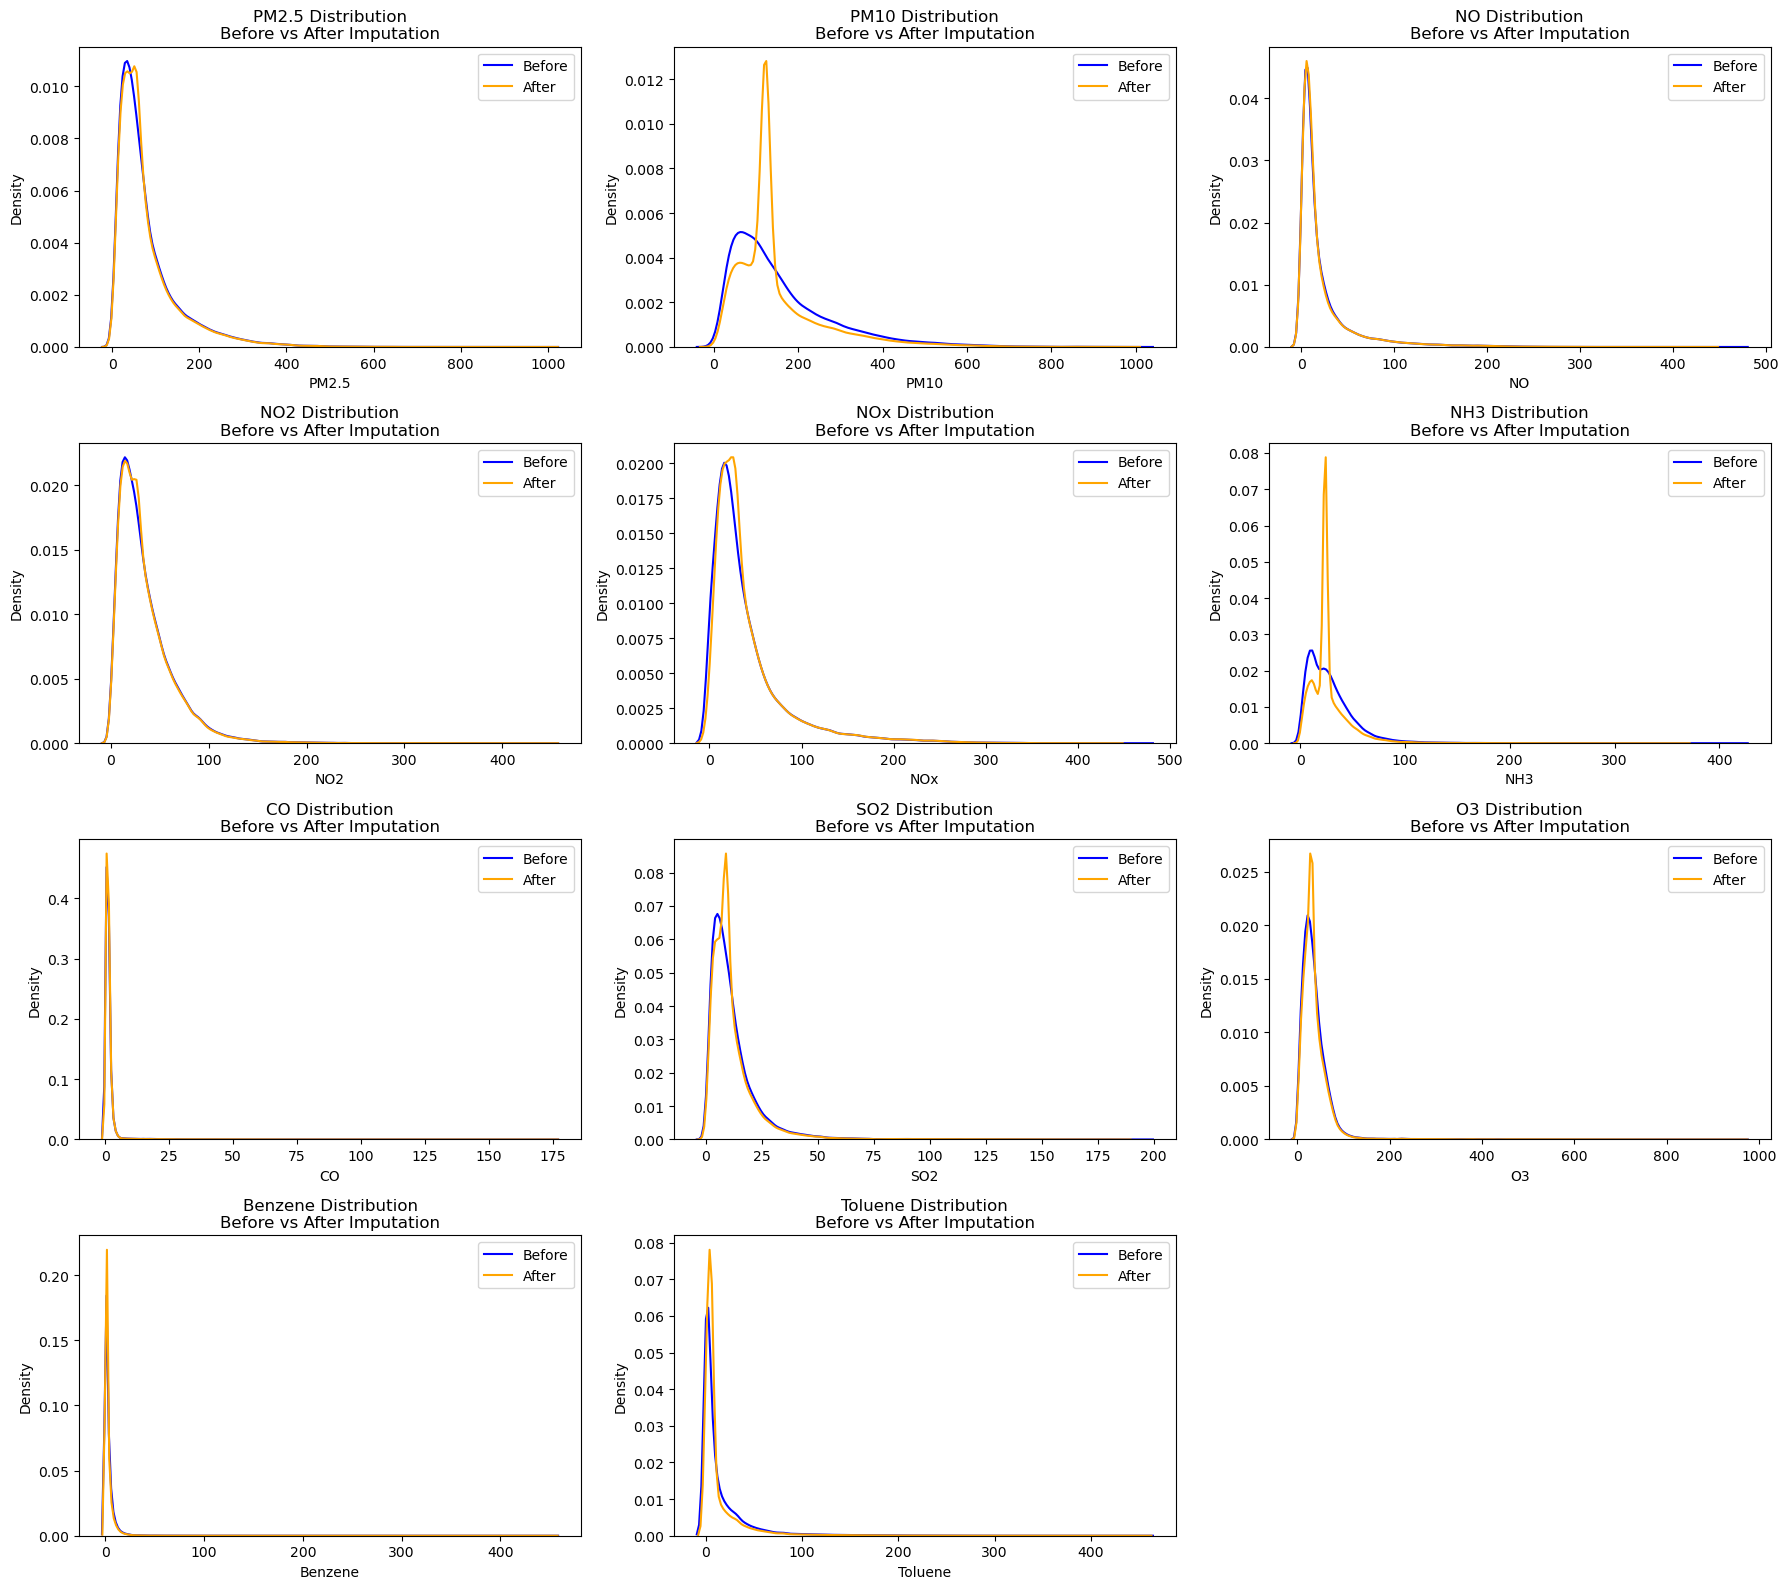

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of pollutants
n = len(pollutant_cols)

# Grid size (rows & columns)
rows = math.ceil(n / 3)   # 3 columns
cols = 3

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(pollutant_cols, 1):
    plt.subplot(rows, cols, i)
    
    sns.kdeplot(df_before[col], label='Before', color='blue')
    sns.kdeplot(df_after_impute[col], label='After', color='orange')
    
    plt.title(f'{col} Distribution\nBefore vs After Imputation')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()



In [369]:
df_before_impute_by_seasonwise_median = df_before_impute.copy()
df_before_impute['PM10'] = df_before_impute.groupby(['State','Season'])['PM10'].transform(lambda x: x.fillna(x.median()))
df_before_impute['NH3']   = df_before_impute.groupby(['State','Season'])['NH3'].transform(lambda x: x.fillna(x.median()))
df_after_impute_by_seasonwise_median = df_before_impute.copy()

In [370]:
pm10_before = df_before_impute_by_seasonwise_median['PM10'].copy()
nh3_before   = df_before_impute_by_seasonwise_median['NH3'].copy()

pm10_after  = df_after_impute_by_seasonwise_median['PM10'].copy()   # after your new imputation
nh3_after    = df_after_impute_by_seasonwise_median['NH3'].copy()


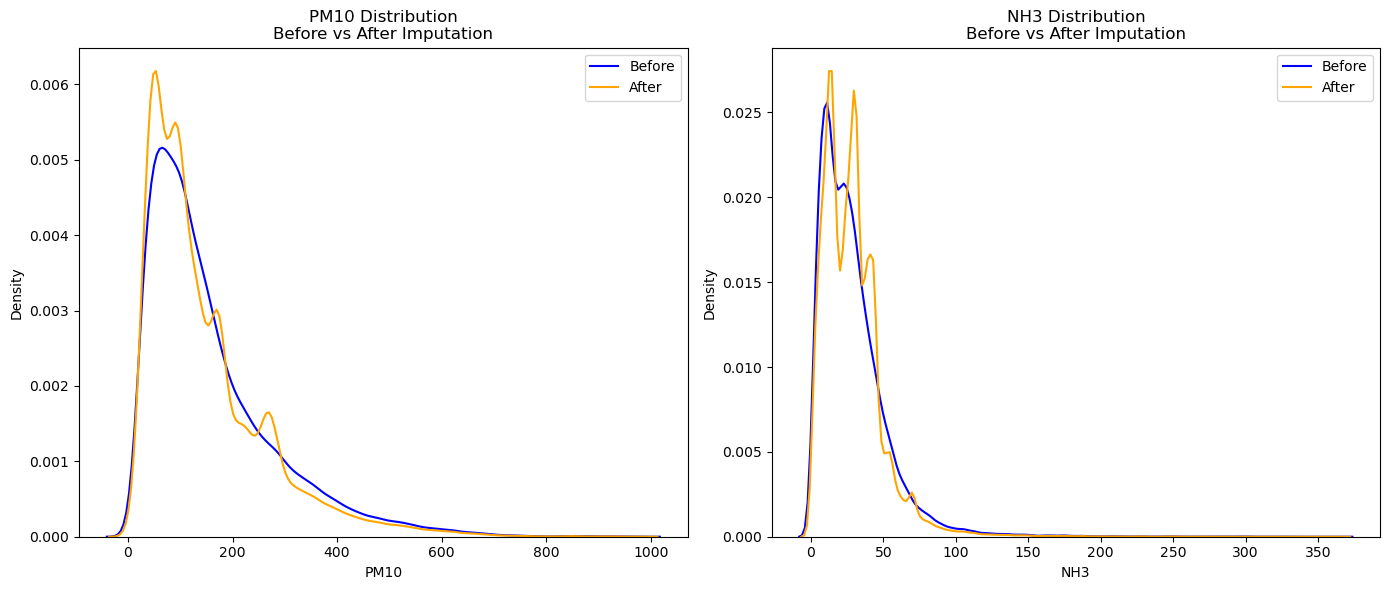

In [371]:
plt.figure(figsize=(14,6))

# PM10 subplot
plt.subplot(1,2,1)
sns.kdeplot(pm10_before, label='Before', color='blue')
sns.kdeplot(pm10_after, label='After', color='orange')
plt.title('PM10 Distribution\nBefore vs After Imputation')
plt.xlabel('PM10')
plt.ylabel('Density')
plt.legend()

# O3 subplot
plt.subplot(1,2,2)
sns.kdeplot(nh3_before, label='Before', color='blue')
sns.kdeplot(nh3_after, label='After', color='orange')
plt.title('NH3 Distribution\nBefore vs After Imputation')
plt.xlabel('NH3')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


In [372]:
df_after_impute['PM10'] = pm10_after
df_after_impute['NH3'] = nh3_after

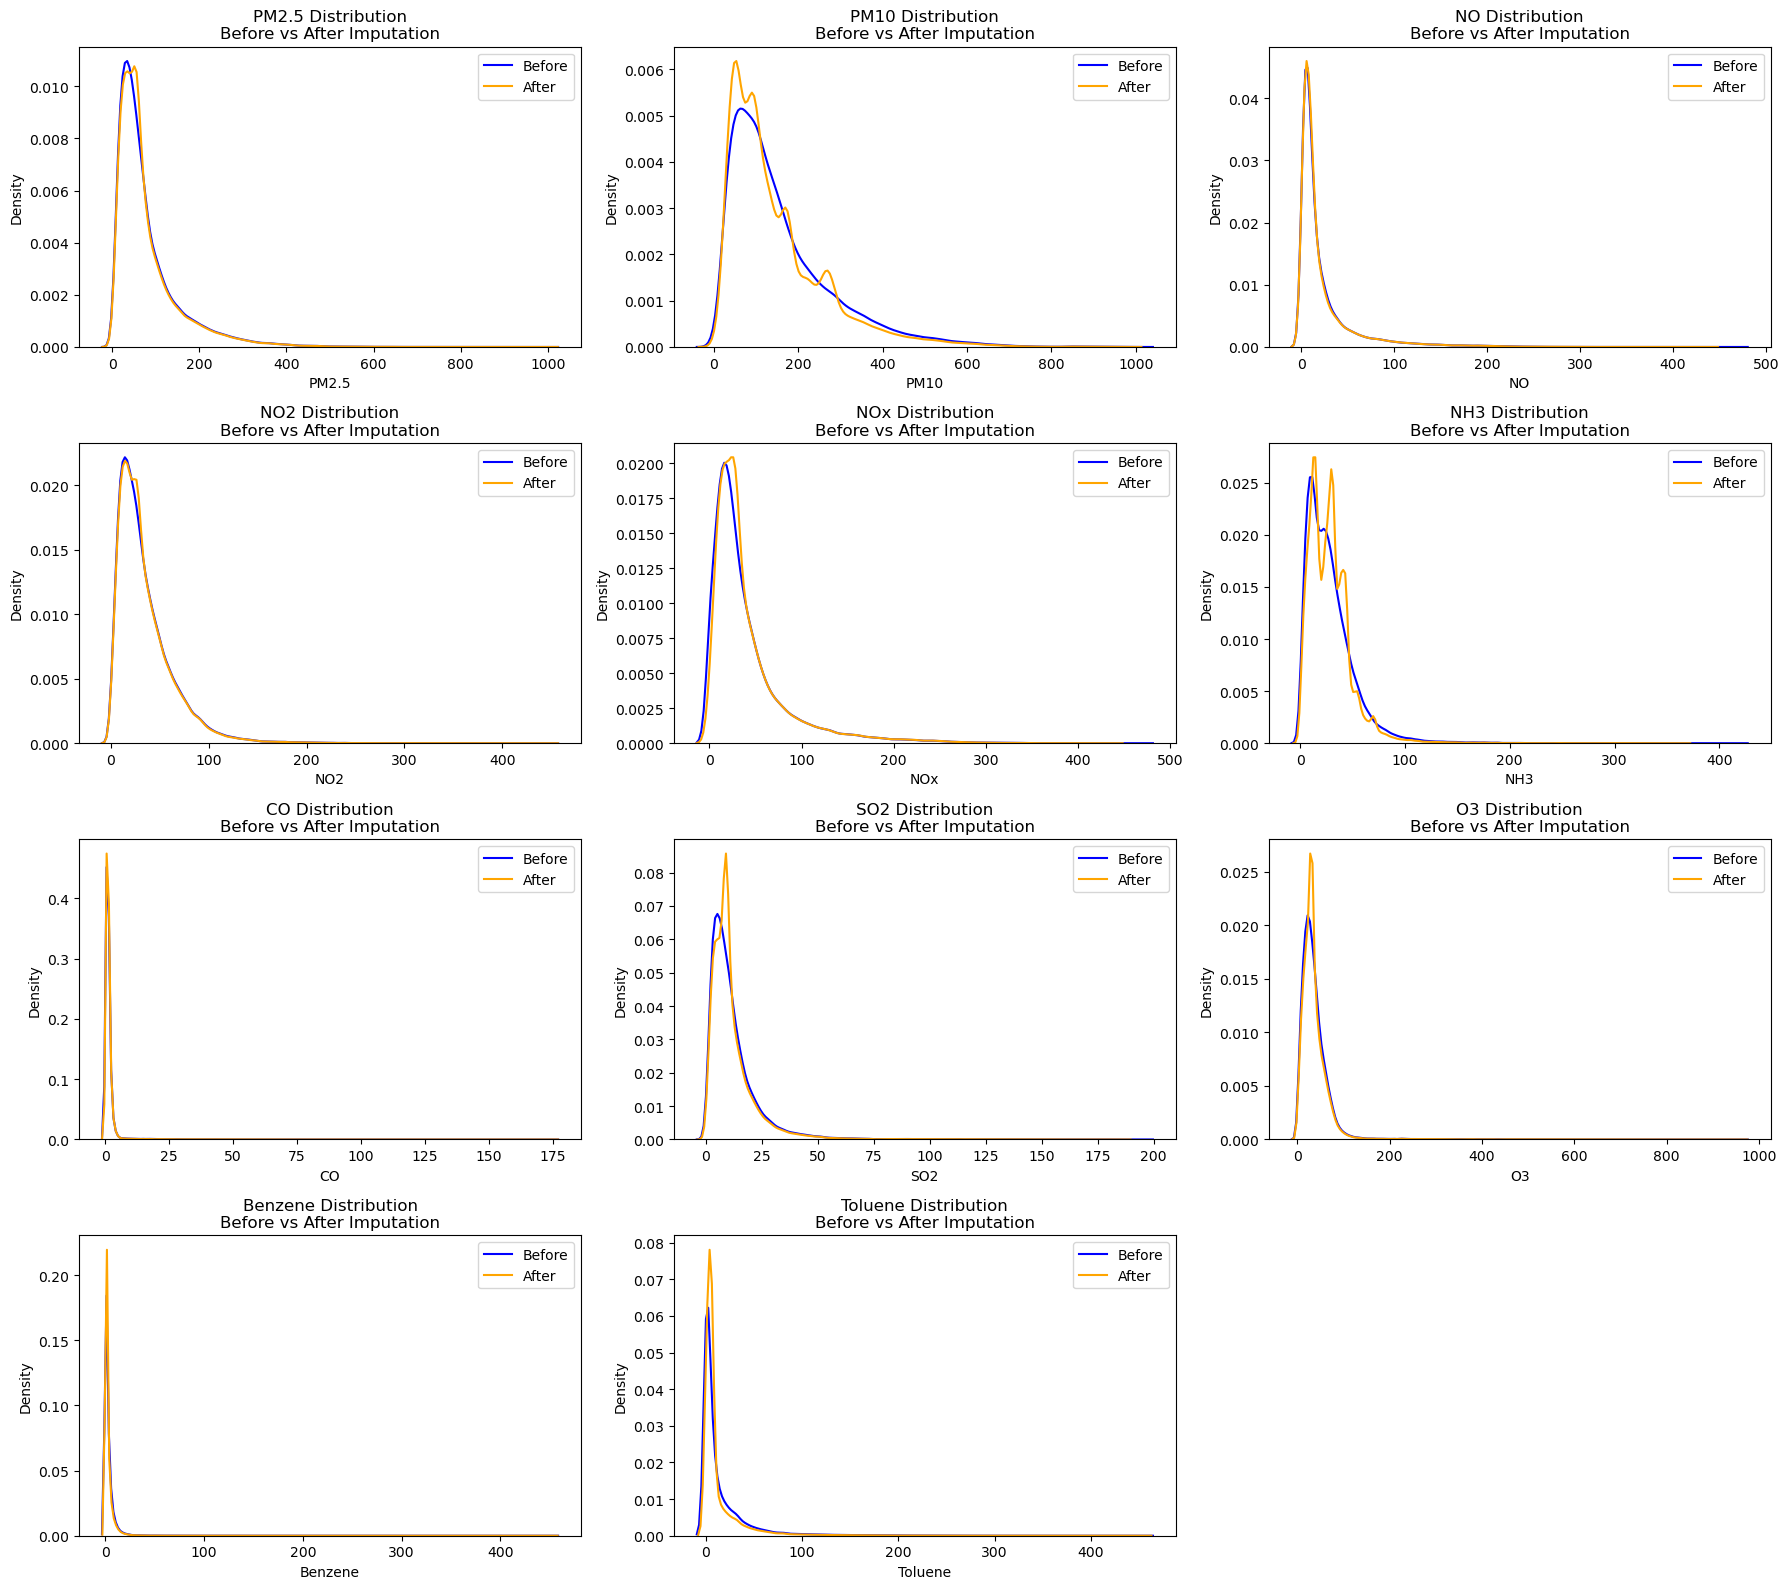

In [373]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of pollutants
n = len(pollutant_cols)

# Grid size (rows & columns)
rows = math.ceil(n / 3)   # 3 columns
cols = 3

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(pollutant_cols, 1):
    plt.subplot(rows, cols, i)
    
    sns.kdeplot(df_before[col], label='Before', color='blue')
    sns.kdeplot(df_after_impute[col], label='After', color='orange')
    
    plt.title(f'{col} Distribution\nBefore vs After Imputation')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_23116\703593431.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='AQI', data=df_before_impute, estimator='mean', ci=None)


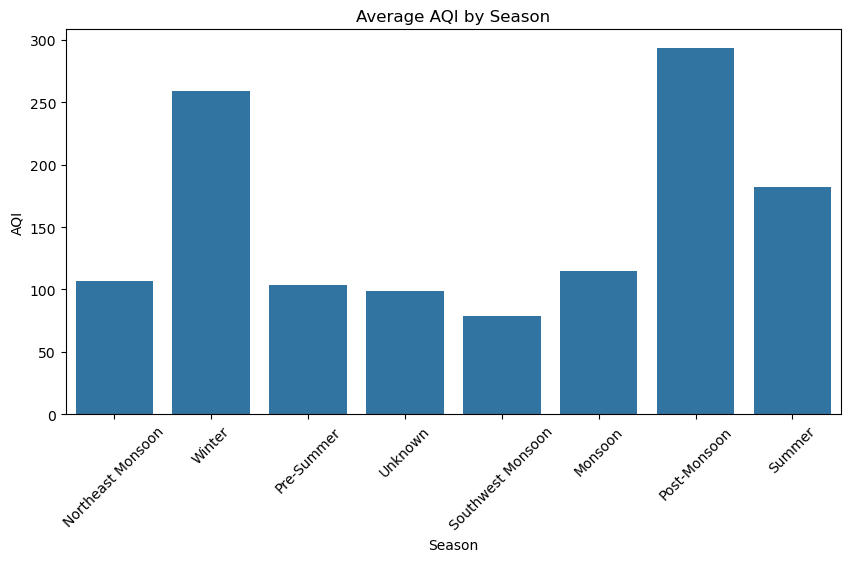

C:\Users\HP\AppData\Local\Temp\ipykernel_23116\703593431.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='AQI', data=df_before_impute, estimator='mean', ci=None)


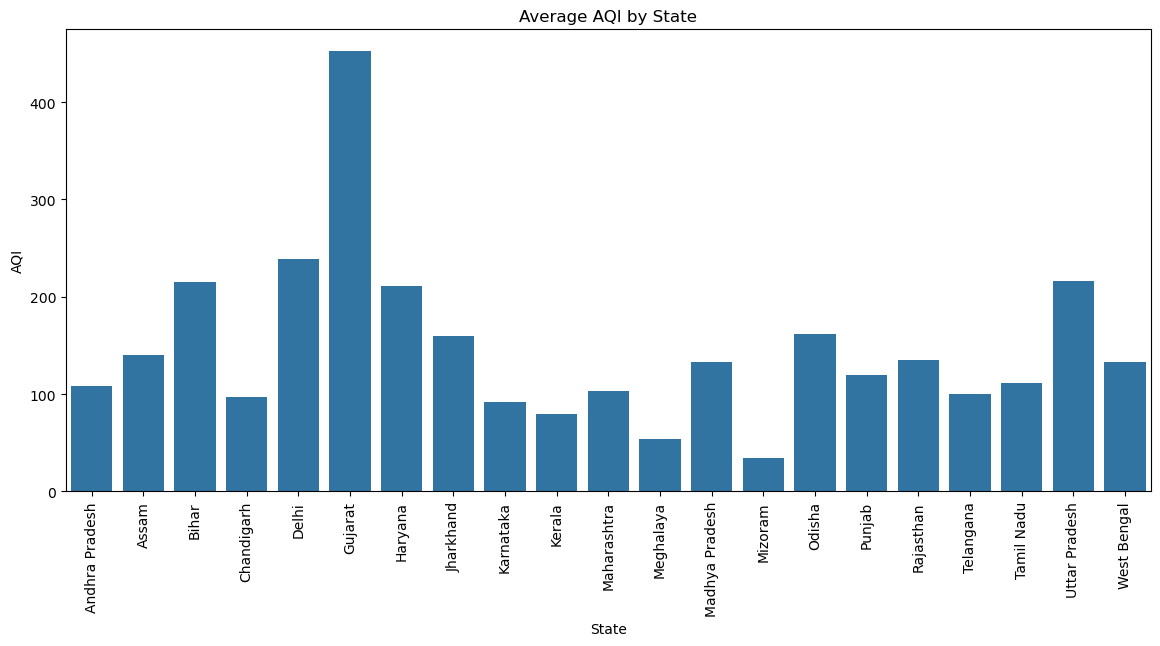

C:\Users\HP\AppData\Local\Temp\ipykernel_23116\703593431.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='StationId', y='AQI', data=df_before_impute, estimator='mean', ci=None)


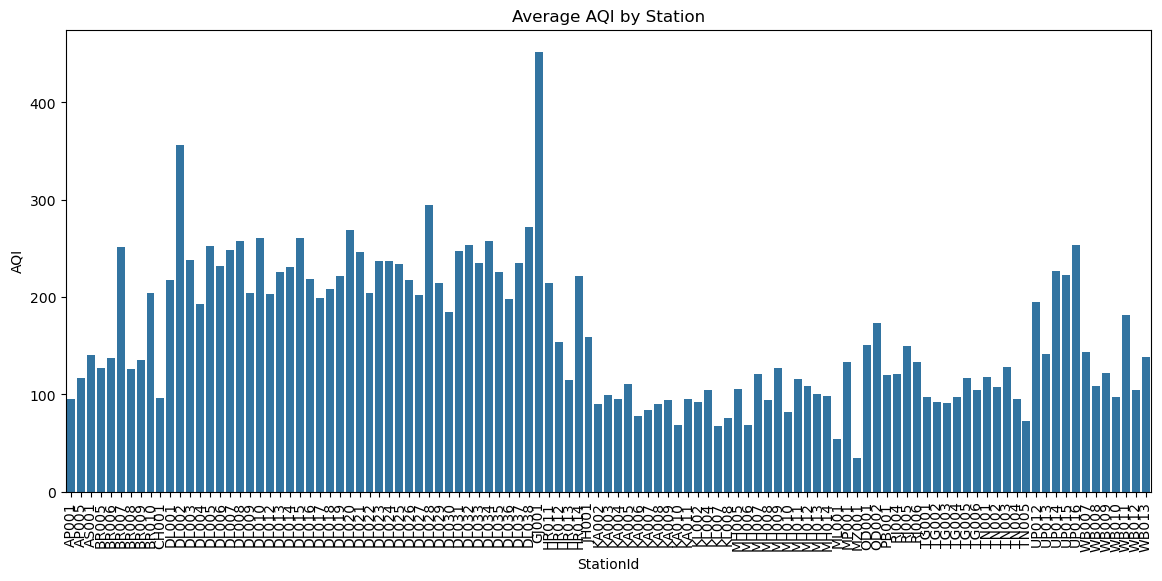

In [374]:
plt.figure(figsize=(10,5))
sns.barplot(x='Season', y='AQI', data=df_before_impute, estimator='mean', ci=None)
plt.title("Average AQI by Season")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(14,6))
sns.barplot(x='State', y='AQI', data=df_before_impute, estimator='mean', ci=None)
plt.title("Average AQI by State")
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,6))
sns.barplot(x='StationId', y='AQI', data=df_before_impute, estimator='mean', ci=None)
plt.title("Average AQI by Station")
plt.xticks(rotation=90)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23116\1577972866.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='AQI', data=df_after_impute, estimator='mean', ci=None)


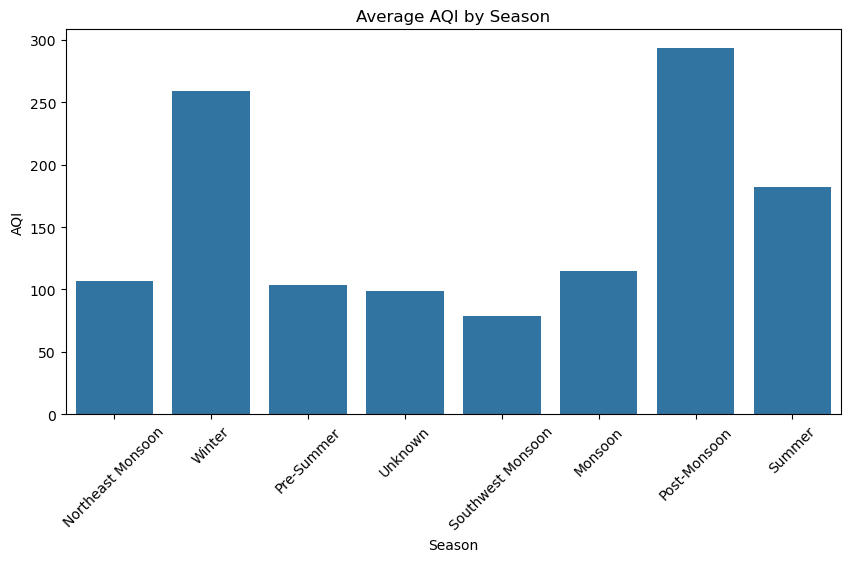

C:\Users\HP\AppData\Local\Temp\ipykernel_23116\1577972866.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='AQI', data=df_after_impute, estimator='mean', ci=None)


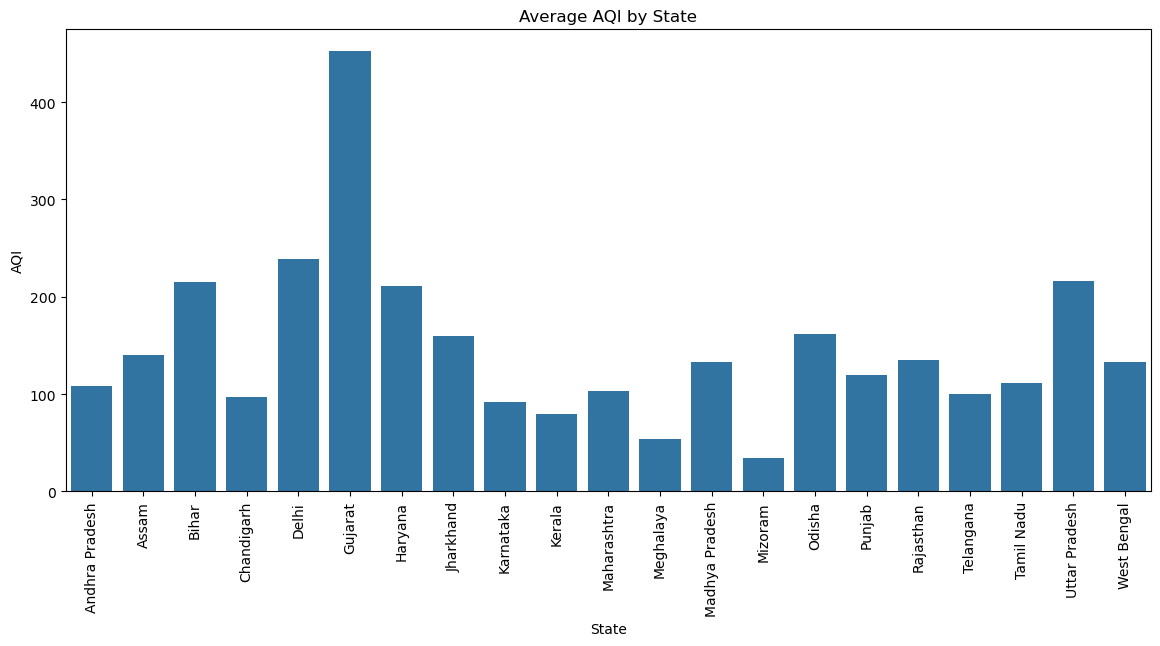

C:\Users\HP\AppData\Local\Temp\ipykernel_23116\1577972866.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='StationId', y='AQI', data=df_after_impute, estimator='mean', ci=None)


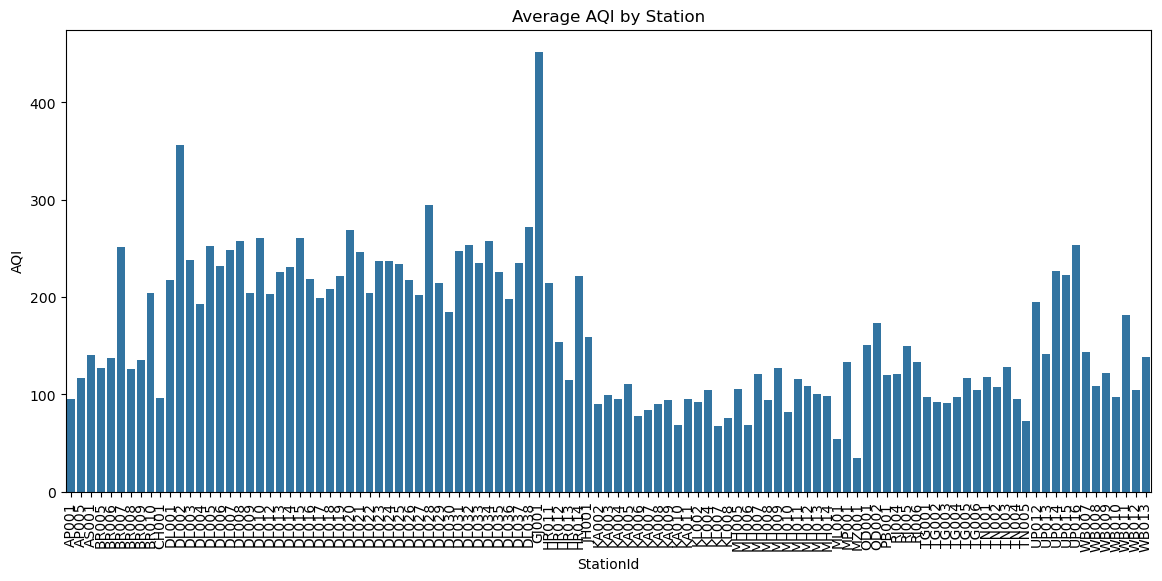

In [375]:
plt.figure(figsize=(10,5))
sns.barplot(x='Season', y='AQI', data=df_after_impute, estimator='mean', ci=None)
plt.title("Average AQI by Season")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(14,6))
sns.barplot(x='State', y='AQI', data=df_after_impute, estimator='mean', ci=None)
plt.title("Average AQI by State")
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,6))
sns.barplot(x='StationId', y='AQI', data=df_after_impute, estimator='mean', ci=None)
plt.title("Average AQI by Station")
plt.xticks(rotation=90)
plt.show()
